In [33]:
import pandas as pd


# Load the data; three files
mut_frequency = pd.read_excel('C:/Users/Sevvalli Thavapalan/OneDrive - UT Cloud/Dokumente/GitHub/CREATE_WebApplicaltion/sgRNA-insert pairs design/Example_Data/argA_test.xlsx')


all_df = pd.read_csv('C:/Users/Sevvalli Thavapalan/OneDrive - UT Cloud/Dokumente/GitHub/CREATE_WebApplicaltion/sgRNA-insert pairs design/Example_Data/argA_test_oligos.csv')



In [34]:
three_one = { "A" : "ALA", "G" : "GLY", "I" : "ILE", "L" : "LEU", "P" : "PRO",
              "V" : "VAL", "F" : "PHE", "W" : "TRP", "Y" : "TYR", "D" : "ASP",
              "E" : "GLU", "R" : "ARG", "H" : "HIS", "K" : "LYS", "S" : "SER",
              "T" : "THR", "C" : "CYS", "M" : "MET", "N" : "ASN", "Q" : "GLN"
    }

In [35]:
# in mut frequency, the mutations are in the form of "A123G"
# we want to convert the letters to the three letter code in two columns calles parent_aa and child_aa
mut_frequency['parent aa'] = mut_frequency['Mutation'].str[0].map(three_one)
mut_frequency['mutated aa'] = mut_frequency['Mutation'].str[-1].map(three_one)
print(mut_frequency)

    Gene Mutation  aa position parent aa mutated aa
0   argA    H162R          162       HIS        ARG
1   argA    R342L          342       ARG        LEU
2   argA    A232T          232       ALA        THR
3   argA    A386T          386       ALA        THR
4   argA    D166E          166       ASP        GLU
..   ...      ...          ...       ...        ...
70  argA    V129I          129       VAL        ILE
71  argA    V234I          234       VAL        ILE
72  argA    K359N          359       LYS        ASN
73  argA    L121M          121       LEU        MET
74  argA     V97L           97       VAL        LEU

[75 rows x 5 columns]


In [36]:
merged_oligos = pd.merge(all_df, mut_frequency, on=['Gene', 'aa position', 'parent aa', 'mutated aa'], how='inner')
#merged_oligos = merged_oligos.drop_duplicates(subset=['Reference'])
print(len(merged_oligos))

52


In [37]:
# Perform the merge with indicator
merged_with_indicator = pd.merge(all_df, mut_frequency, on=['Gene', 'aa position', 'parent aa', 'mutated aa'], how='left', indicator=True)

# Select rows that are only in all_df (i.e., non-matching rows)
non_matching_rows = merged_with_indicator[merged_with_indicator['_merge'] == 'left_only'].drop(columns=['_merge'])

# Drop duplicates based on 'Reference'
#non_matching_rows = non_matching_rows.drop_duplicates(subset=['Reference'])

# Display or use non_matching_rows
print(len(non_matching_rows))


6362


In [38]:
unique_mutated_aa = non_matching_rows['mutated aa'].unique()
print(f"Unique mutated aa values: {unique_mutated_aa}")

Unique mutated aa values: ['ARG' 'LEU' 'THR' 'VAL' 'GLU' 'LYS' 'GLN' 'ILE' 'MET' 'SER' 'TYR' 'ASN'
 'ALA' 'ASP' 'HIS' 'CYS']


In [39]:
mutated_aa_counts = non_matching_rows['mutated aa'].value_counts()
print(mutated_aa_counts)
print(sum(mutated_aa_counts))

ARG    1118
LEU     853
SER     837
THR     786
VAL     492
ILE     405
GLU     295
ALA     284
GLN     272
LYS     239
TYR     229
ASN     226
ASP     145
MET     109
HIS      56
CYS      16
Name: mutated aa, dtype: int64
6362


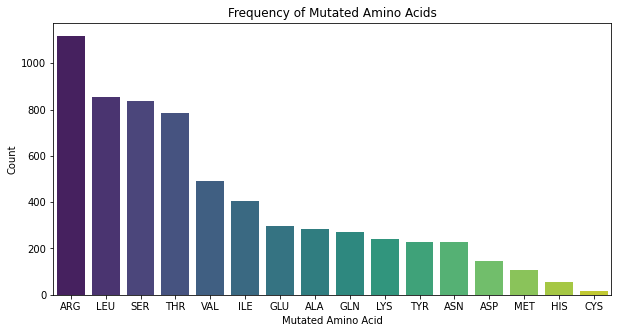

In [43]:
mutated_aa_counts_clinical = merged_oligos['mutated aa'].value_counts()
print(mutated_aa_counts_clinical)
print(sum(mutated_aa_counts_clinical))

SER    24
THR    16
GLU     6
TYR     6
Name: mutated aa, dtype: int64
52


In [75]:
pathways = pd.read_excel("20240304_Mutations_Metabolic_Genes.xlsx")
merged_oligos = pd.merge(merged_oligos, pathways[['gene', 'Pathway']], on='gene', how='left')


In [ ]:
print(len(merged_oligos))
# print the number of unique pathways
print(merged_oligos['Pathway'].nunique())
print(merged_oligos['gene'].nunique())
# print unique genes + positions + mutated aa
print(merged_oligos[['gene', 'aa position', 'mutated aa']].drop_duplicates().sort_values(by=['gene', 'aa position']))

13132
38
       gene  aa position mutated aa
0      accB           36        THR
3      aceA           50        SER
29     aceB           12        THR
8      aceB           14        ARG
38     aceB           15        TRP
...     ...          ...        ...
13120  zntA           26        VAL
13117  zntA           28        GLU
13126   zwf           40        THR
13123   zwf           73        ALA
13129   zwf           84        GLY

[4812 rows x 3 columns]


In [ ]:
#save the merged file
merged_oligos.to_excel('merged_oligos.xlsx', index=False)